In [1]:
# Imports
import scipy.stats as stats
import numpy as np
import pandas as pd
from pandasai import PandasAI
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import explore as e
import prepare
import warnings
warnings.filterwarnings("ignore")
import plotly.express
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

df = prepare.prepare_edu()


In [2]:
train, validate, test = prepare.split(df)
modeling = ['parent_educ_bachelors_degree', 'parent_educ_high_school','parent_educ_masters_degree', 'parent_educ_some_college','parent_educ_some_high_school', 'final_score', 'risk_rating',
'free_reduced_lunch', 'test_prep_completed', 'is_male']
df = df[modeling] 
train = train[modeling]
validate = validate[modeling]
test = test[modeling]


In [3]:
train.columns

Index(['parent_educ_bachelors_degree', 'parent_educ_high_school',
       'parent_educ_masters_degree', 'parent_educ_some_college',
       'parent_educ_some_high_school', 'final_score', 'risk_rating',
       'free_reduced_lunch', 'test_prep_completed'],
      dtype='object')

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test= e.modeling_split(train,validate,test)
y_train.drop(columns='final_score', inplace=True)
y_validate.drop(columns='final_score', inplace=True)
y_test.drop(columns='final_score',inplace=True)

# Lets set some baselines for our model (risk_rating)

    First let's look at what is the most common occurrence of the risk rating 

In [5]:
df.risk_rating.value_counts()

risk_rating
low_risk     13589
high_risk     9853
at_risk       7190
Name: count, dtype: int64

    We will set our baseline accordingly to the value counts above

In [6]:
X_train

,parent_educ_bachelors_degree,parent_educ_high_school,parent_educ_masters_degree,parent_educ_some_college,parent_educ_some_high_school,free_reduced_lunch,test_prep_completed
30178,0,0,0,1,0,0,1
15705,0,1,0,0,0,0,1
7163,0,0,0,1,0,1,0
4147,0,0,1,0,0,0,1
25763,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
17210,0,0,0,0,0,1,0
16733,0,0,1,0,0,1,1
26266,0,0,0,1,0,0,1
13470,0,0,0,0,0,0,0


In [7]:
master_df= df['baseline_risk_rating'] = 'high_risk'

# Random Forest Classifer

In [53]:
# make the model 
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=8,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=123)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)
train_models = pd.DataFrame()
train_models['actual'] = y_train
train_models['baseline'] = 'low_risk'
train_models['random_forest'] = y_pred_rf
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

     at_risk       0.54      0.20      0.30      3978
   high_risk       0.54      0.43      0.47      5530
    low_risk       0.48      0.71      0.57      7645

    accuracy                           0.50     17153
   macro avg       0.52      0.45      0.45     17153
weighted avg       0.51      0.50      0.48     17153



In [9]:
# # Make the model
# rf = RandomForestClassifier(bootstrap=True, 
#                             class_weight=None, 
#                             criterion='gini',
#                             min_samples_leaf=8,
#                             n_estimators=100,
#                             max_depth=10, 
#                             random_state=123)

# rf.fit(X_train, y_train)

# # Use the model to predict the validation group
# y_pred = rf.predict(X_validate)
# y_pred_proba = rf.predict_proba(X_validate)

# # Create a DataFrame to store the results
# validate_models = pd.DataFrame()
# validate_models['actual'] = y_validate
# validate_models['baseline'] = 'low_risk'
# validate_models['random_forest'] = y_pred

# # Print the classification report for the validation group
# print(classification_report(y_validate, y_pred))


# Descion Tree

In [41]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=123)

In [42]:
clf = clf.fit(X_train, y_train)
y_pred_clf= clf.predict(X_train)

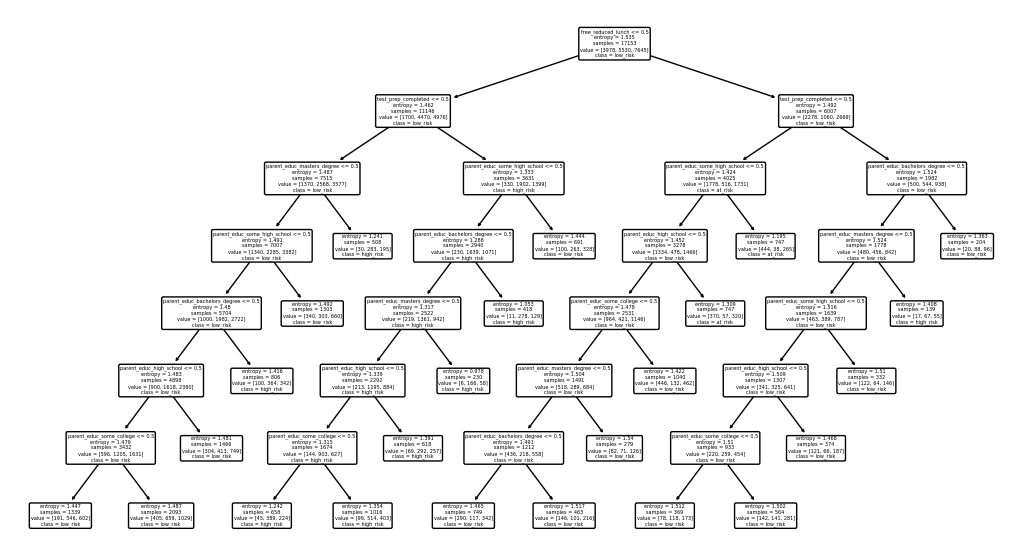

In [43]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)
plt.show()

In [44]:
print(classification_report(y_train, y_pred_clf))

              precision    recall  f1-score   support

     at_risk       0.54      0.20      0.30      3978
   high_risk       0.54      0.43      0.47      5530
    low_risk       0.48      0.71      0.57      7645

    accuracy                           0.50     17153
   macro avg       0.52      0.45      0.45     17153
weighted avg       0.51      0.50      0.48     17153



In [14]:
# y_pred_clf_val = clf.predict(X_validate)

# # Compare actual y values (from validate) to predicted y_values from the model run on X_validate
# print(classification_report(y_validate, y_pred_clf_val))

In [15]:
# y_pred_clf = clf.predict(X_test)

# # Compare actual y values (from validate) to predicted y_values from the model run on X_validate
# print(classification_report(y_test, y_pred_clf))

## KNN 

In [16]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto')

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [18]:
y_pred_knn = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [19]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

     at_risk       0.41      0.35      0.38      3978
   high_risk       0.46      0.53      0.49      5530
    low_risk       0.48      0.46      0.47      7645

    accuracy                           0.46     17153
   macro avg       0.45      0.45      0.45     17153
weighted avg       0.46      0.46      0.46     17153



# Logistic Regression

In [20]:
logit = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='lbfgs')

In [21]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [22]:
y_pred_lr = logit.predict(X_train)

In [23]:
print(classification_report(y_train, y_pred_lr))


              precision    recall  f1-score   support

     at_risk       0.50      0.32      0.39      3978
   high_risk       0.54      0.43      0.47      5530
    low_risk       0.48      0.65      0.55      7645

    accuracy                           0.50     17153
   macro avg       0.51      0.46      0.47     17153
weighted avg       0.50      0.50      0.49     17153



# Baseline model classification report

In [24]:
print(classification_report(y_train,train_models.baseline))

              precision    recall  f1-score   support

     at_risk       0.00      0.00      0.00      3978
   high_risk       0.00      0.00      0.00      5530
    low_risk       0.45      1.00      0.62      7645

    accuracy                           0.45     17153
   macro avg       0.15      0.33      0.21     17153
weighted avg       0.20      0.45      0.27     17153

